In [1]:
import pandas as pd
import time
import datetime
import numpy as np
import split_data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl  
import warnings
warnings.filterwarnings('ignore')
import plot_show

In [2]:
df = pd.read_csv('../data/zhao_neng_2_month.txt',sep='\t',header=None,names=['ap_mac','timestamp','count'])
print('原始数据ap个数',len(df.ap_mac.unique()))

原始数据ap个数 60599


In [24]:
df.head(1)

,ap_mac,timestamp,count
0,08-A5-C8-28-21-DB,1521432000,28


In [20]:
types_df = pd.read_csv("../data/eqp_type.txt",sep='\t',names=['ap_mac','company','address','type'])

In [23]:
types_df.head(1)

,ap_mac,company,address,type
0,10-77-B0-8F-4E-A0,a东莞市东城梦歌歌舞厅,东莞市东城区牛山管理区牛头二村佰美商业街商铺楼2层梦歌KTV101(牛山派出所),1


In [29]:
df_with_type = df.merge(types_df,how='left',on='ap_mac')

In [31]:
df_with_type.head()

,ap_mac,timestamp,count,company,address,type
0,08-A5-C8-28-21-DB,1521432000,28,NaN,NaN,NaN
1,08-A5-C8-28-21-DB,1521435600,25,NaN,NaN,NaN
2,08-A5-C8-28-21-DB,1521439200,34,NaN,NaN,NaN
3,08-A5-C8-28-21-DB,1521442800,30,NaN,NaN,NaN
4,08-A5-C8-28-21-DB,1521446400,33,NaN,NaN,NaN


In [4]:
groupd = df.groupby('ap_mac')
cnt_series = groupd['count'].count()
cnt_series.sort_values(ascending=False,inplace=True)

In [5]:
print(cnt_series.median())
cnt_series.head()

204.0


ap_mac
60-31-3B-1E-DA-F4    1460
60-31-3B-1C-49-91    1459
60-31-3B-1E-A1-52    1458
60-31-3B-1E-C0-06    1458
64-9A-08-05-97-D0    1457
Name: count, dtype: int64

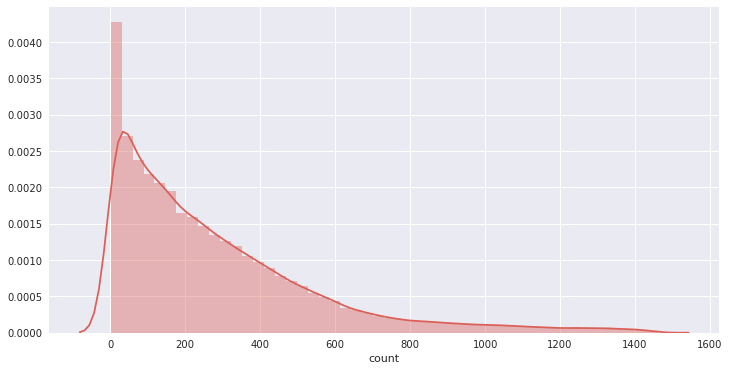

In [6]:
sns.set_palette("hls")  
mpl.rc("figure", figsize=(12, 6))  
sns.distplot(cnt_series)
plt.show()

In [7]:
top1_ap = df[df.ap_mac=='60-31-3B-1E-DA-F4'][['timestamp','count']]
top1_ap['datetime'] = top1_ap.timestamp.apply(lambda x: datetime.datetime.fromtimestamp(x))
top1_ap.set_index('datetime',drop=True, inplace=True)

In [8]:
top1_ap.head()

,timestamp,count
datetime,,
2018-02-28 23:00:00,1519830000,4
2018-03-01 00:00:00,1519833600,3129
2018-03-01 01:00:00,1519837200,1089
2018-03-01 02:00:00,1519840800,85
2018-03-01 03:00:00,1519844400,340


In [10]:
plot_show.plt_one_ts(top1_ap['count'][:24*10])

In [11]:
top_ap_oneday = top1_ap[:]
top_ap_oneday['time'] = top_ap_oneday.timestamp.apply(lambda x: time.localtime(x))
top_ap_oneday['datetime'] = top1_ap.timestamp.apply(lambda x: datetime.datetime.fromtimestamp(x))
top_ap_oneday['hour'] = top_ap_oneday.time.apply(lambda x: x.tm_hour)
top_ap_oneday['weekday'] = top_ap_oneday.datetime.apply(lambda x: x.isoweekday())

In [12]:
groupd_top = top_ap_oneday.groupby(['weekday','hour'], as_index=False)['count'].agg(sum)
plot_show.plt_one_ts(groupd_top['count'])

In [13]:
groupd_top_one_day = top_ap_oneday.groupby(['hour'], as_index=False)['count'].agg(sum)
plot_show.plt_one_ts(groupd_top_one_day['count'])

In [14]:
top1000_mac = cnt_series[:1000].index.values
top1000_df = df[df['ap_mac'].isin(top1000_mac)]
# top1000_df.to_csv("../data/zhaoneng_top1000_mac_raw.csv",index=False)

In [15]:
top1000_df.head()

,ap_mac,timestamp,count
5822,08-A5-C8-84-EA-F8,1519833600,55
5823,08-A5-C8-84-EA-F8,1519837200,227
5824,08-A5-C8-84-EA-F8,1519844400,3
5825,08-A5-C8-84-EA-F8,1519858800,2
5826,08-A5-C8-84-EA-F8,1519862400,30


In [ ]:
# 24行的空dataframe
def gen_empty_df():
    df = pd.DataFrame(np.random.randn(24),columns=['tmp'])
    return df

# 扩充 hour特征
def time_feature(df):
    df['time'] = df.timestamp.apply(lambda x: time.localtime(x))
#     df['datetime'] = df.timestamp.apply(lambda x: datetime.datetime.fromtimestamp(x))
    df['hour'] = df.time.apply(lambda x: x.tm_hour)
    return df

def get_split_1000_ts(df,macs):
    result_df = gen_empty_df()
    for mac in macs:
        mac_df = df[df.ap_mac==mac]
        mac_df = time_feature(mac_df)
        grouped_mac = mac_df.groupby('hour')['count'].agg(sum)
        result_df[mac] = grouped_mac
    return result_df

In [ ]:
top1000_24h_df = get_split_1000_ts(df,top1000_mac)

In [ ]:
# top1000_24h_df.to_csv('../data/top1000_24h.csv',index=False)